# ML Project: Ethereum Fraudulent Transaction Detection
####  Dataset Overview
**Source**: Ethereum Fraud Detection Dataset (Kaggle).

**Observations**: ~9841  unique Ethereum addresses.

**Target Variable (FLAG)**: Binary classification (0: Normal, 1: Fraud).

**Features**: Includes transaction frequency, average time between transactions, Ether sent/received, and smart contract interaction history......






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('transaction_dataset.csv')

# Data Understanding

In [3]:
df.shape

(9841, 51)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [5]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [6]:
df.tail()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,9840,2179,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,1,37242.70,149.56,670817.33,18,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,,INS Promo1


In [7]:
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [8]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


# Data Cleaning


Detect and handle inconsistencies, missing values, and outliers.

Missing Value Handling: Imputation (mean/median/mode) or deletion.



In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.drop(['Unnamed: 0', 'Index', 'Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type'],axis=1,inplace=True)
              

In [11]:
zero_var = [col for col in df.columns if df[col].nunique() <= 1]
df = df.drop(columns=zero_var)

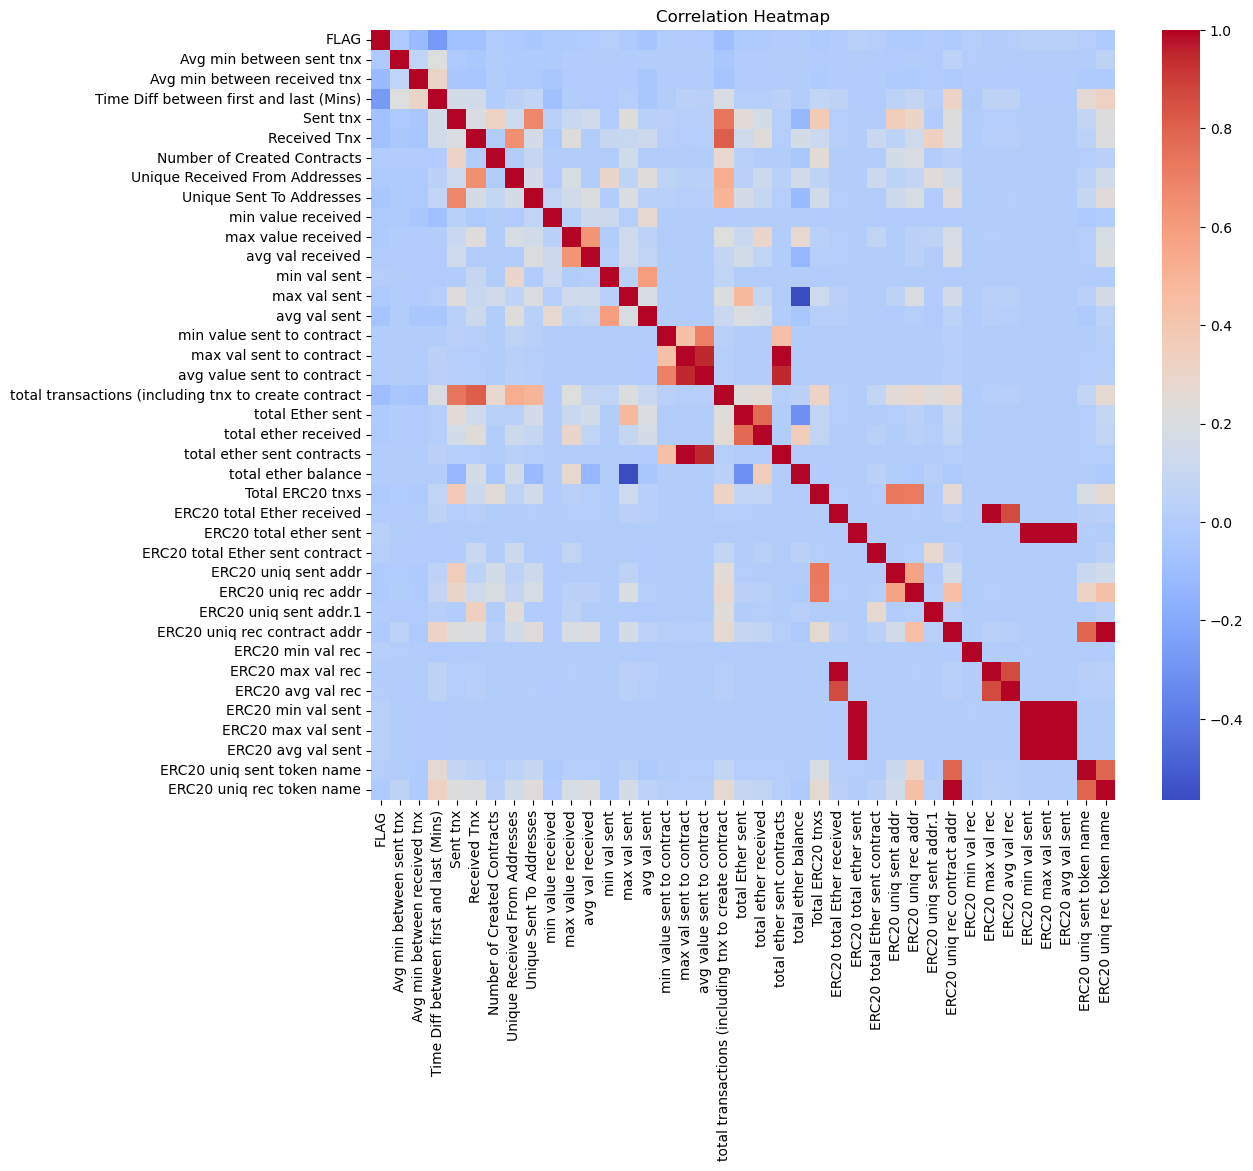

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
corr_matrix = df.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.90)]
df.drop(columns=to_drop_corr, inplace=True)

In [13]:
df.isnull().sum()


FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [14]:
(df.isnull().sum()/len(df)*100)

FLAG                                                    0.000000
Avg min between sent tnx                                0.000000
Avg min between received tnx                            0.000000
Time Diff between first and last (Mins)                 0.000000
Sent tnx                                                0.000000
Received Tnx                                            0.000000
Number of Created Contracts                             0.000000
Unique Received From Addresses                          0.000000
Unique Sent To Addresses                                0.000000
min value received                                      0.000000
max value received                                      0.000000
avg val received                                        0.000000
min val sent                                            0.000000
max val sent                                            0.000000
avg val sent                                            0.000000
min value sent to contrac

In [15]:
df.fillna(0,axis=0,inplace=True)

In [16]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
total transact

In [17]:
df = df.drop_duplicates()


In [18]:
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,265586.147600,39.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,57.632615,1.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,65.189009,0.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,1555.550174,1.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,4934.232147,6.0


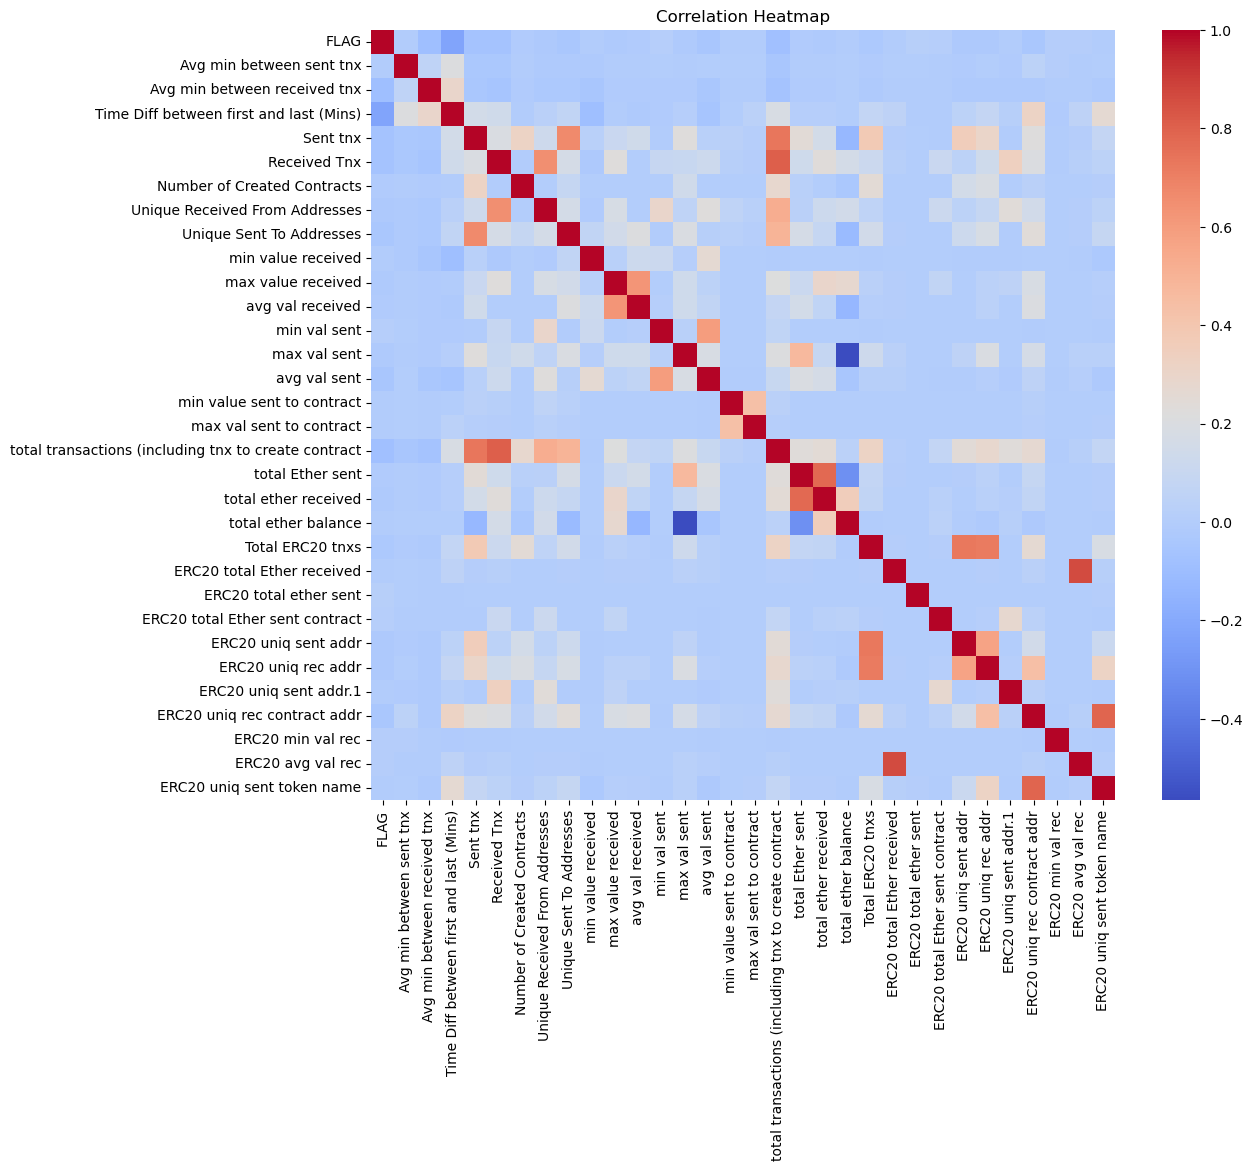

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

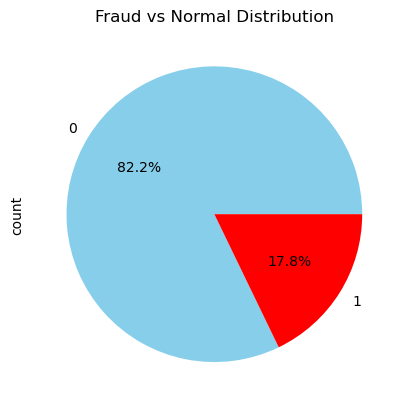

In [20]:
df['FLAG'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'red'])
plt.title("Fraud vs Normal Distribution")
plt.show()

**Description:** This chart visualizes the class balance of the dataset. It shows the proportion of fraudulent accounts (FLAG 1) compared to normal accounts (FLAG 0).

**Key Insight:** The dataset is highly imbalanced, with normal transactions far outnumbering fraudulent ones.

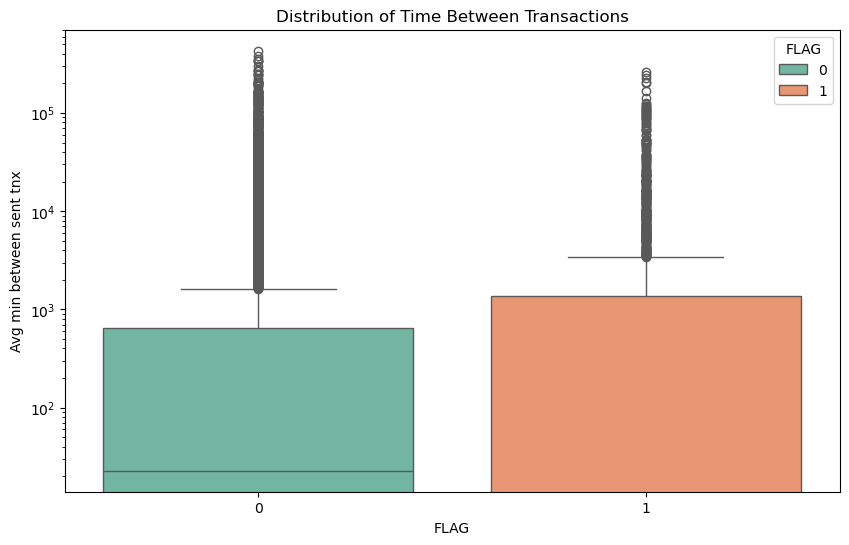

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FLAG',y='Avg min between sent tnx',data=df,hue='FLAG',palette="Set2")
plt.yscale('log') 
plt.title('Distribution of Time Between Transactions')
plt.show()

**Key Insight:** Fraudulent accounts usually make transactions very quickly, with short gaps between each transaction. This shows fast and repeated activity, which is often linked to automated or suspicious behavior. Normal accounts take longer and more natural breaks between transactions, like real human usage. Even though the data has some extreme values, fraud cases are mostly grouped at shorter time gaps, making the time between transactions a strong feature for detecting fraud.

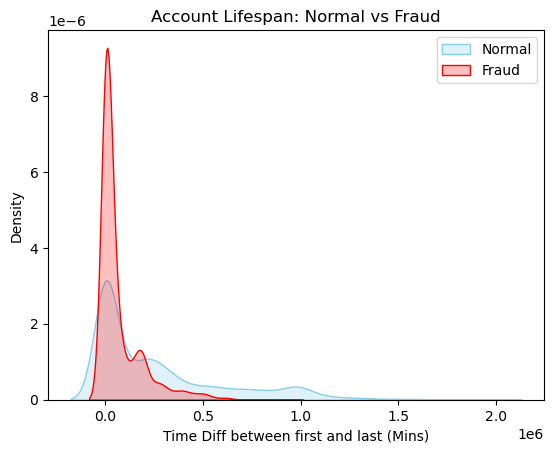

In [22]:
sns.kdeplot(data=df[df['FLAG'] == 0], x='Time Diff between first and last (Mins)', 
            label='Normal', fill=True, color='skyblue')

sns.kdeplot(data=df[df['FLAG'] == 1], x='Time Diff between first and last (Mins)', 
            label='Fraud', fill=True, color='red')

plt.title('Account Lifespan: Normal vs Fraud')
plt.legend()
plt.show()

**Key Insight:** fraudulent accounts tend to have very short lifespans, with activity concentrated near the beginning, while normal accounts remain active for much longer periods; this clear behavioral difference shows that account lifespan is a highly effective feature for identifying fraud, as shorter-lived accounts are significantly more likely to be fraudulent.

In [23]:
X=df.drop('FLAG',axis=1)
y=df['FLAG']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

In [26]:
scaler=RobustScaler()

In [27]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
fraud_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        max_depth=12, 
        class_weight='balanced', 
        random_state=42, 
        n_jobs=-1
    ))])


In [30]:
fraud_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,n_estimators,100
,criterion,'gini'


In [31]:
y_pred=fraud_pipeline.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1527
           1       0.92      0.81      0.86       331

    accuracy                           0.95      1858
   macro avg       0.94      0.90      0.92      1858
weighted avg       0.95      0.95      0.95      1858



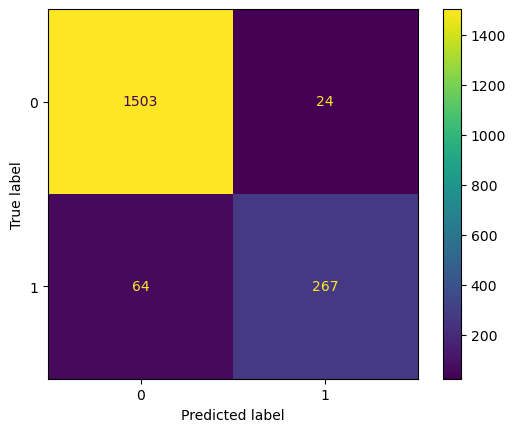

In [34]:
ConfusionMatrixDisplay.from_estimator(fraud_pipeline,X_test,y_test)
plt.show()

In [35]:
importances = fraud_pipeline.named_steps['classifier'].feature_importances_

In [36]:
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

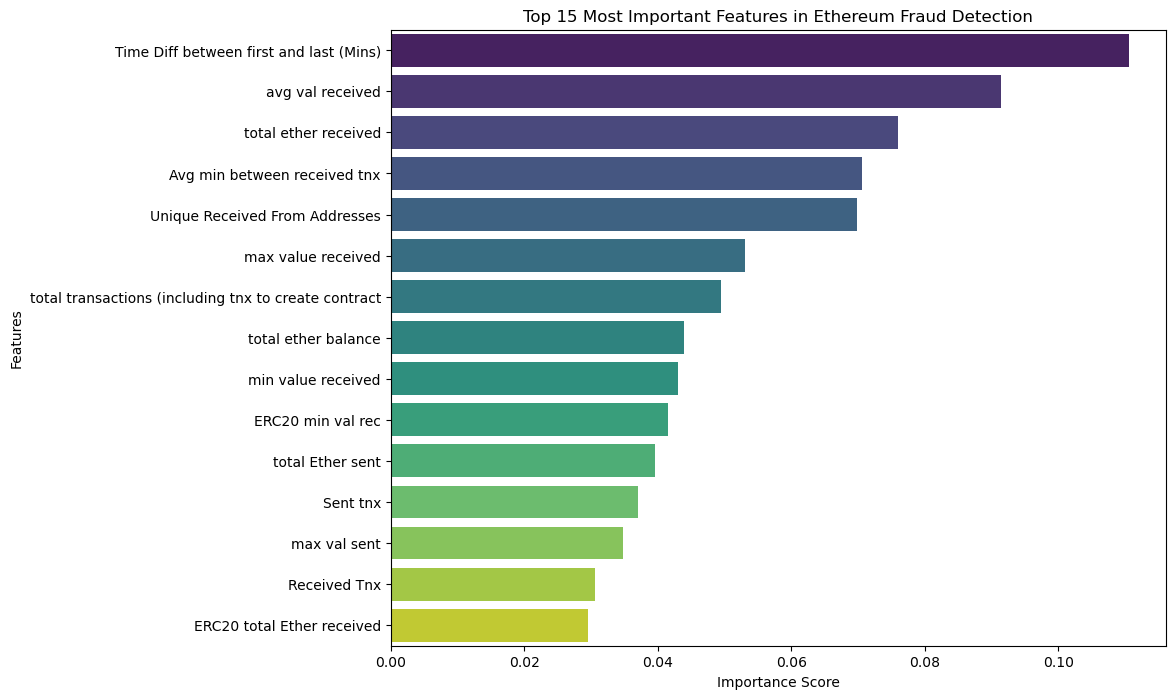

In [37]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index, hue=feature_importance.head(15).index, palette='viridis', legend=False)
plt.title('Top 15 Most Important Features in Ethereum Fraud Detection')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

In [39]:
fraud_recall = make_scorer(recall_score, pos_label=1)


In [40]:
param_grid = {
    'classifier__n_estimators': [300, 500],
    'classifier__max_depth': [None, 15, 25],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5]
}

In [41]:
grid = GridSearchCV(
    estimator=fraud_pipeline, 
    param_grid=param_grid,
    scoring=fraud_recall,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 15, ...], 'classifier__min_samples_leaf': [1, 2, ...], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [300, 500]}"
,scoring,"make_scorer(r..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,with_centering,True


In [42]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1527
           1       0.89      0.85      0.87       331

    accuracy                           0.95      1858
   macro avg       0.93      0.91      0.92      1858
weighted avg       0.95      0.95      0.95      1858



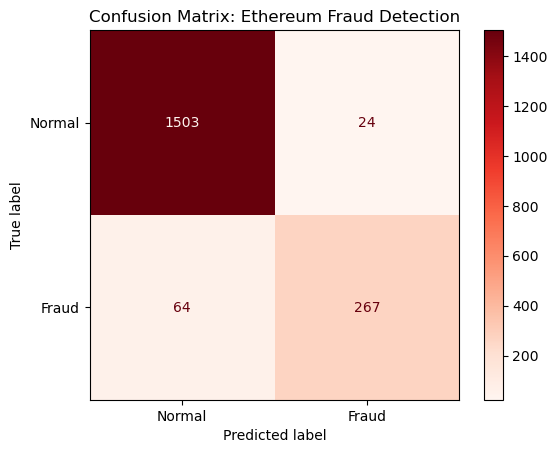

In [43]:
disp = ConfusionMatrixDisplay.from_estimator(
    fraud_pipeline, 
    X_test, 
    y_test, 
    display_labels=['Normal', 'Fraud'], 
    cmap='Reds', 
    values_format='d'
)

plt.title("Confusion Matrix: Ethereum Fraud Detection")
plt.grid(False) 
plt.show()

In [44]:
y_prob = best_model.predict_proba(X_test)[:, 1]

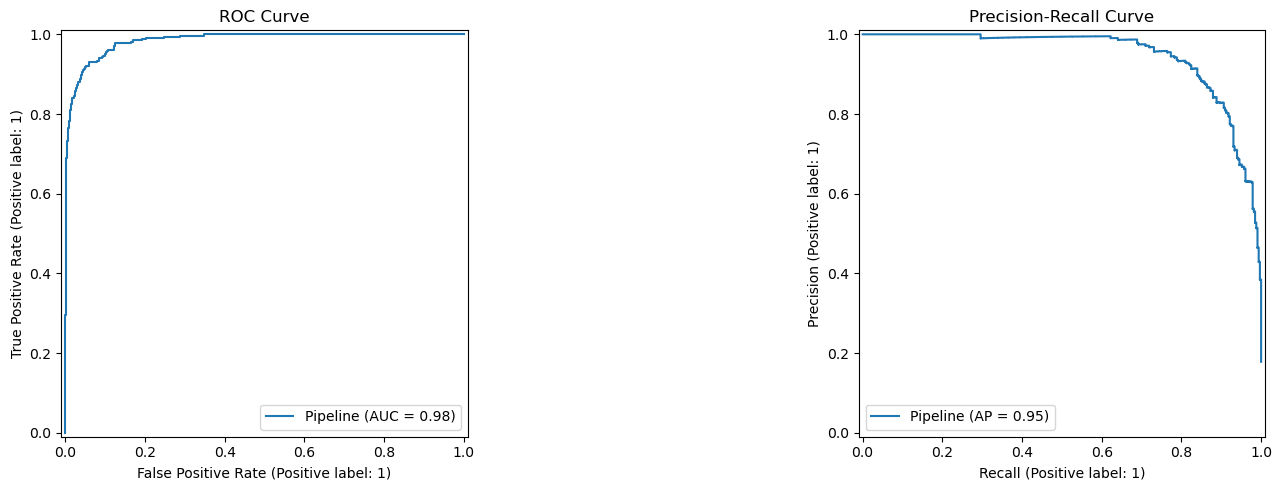

In [45]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
ax[0].set_title("ROC Curve")

PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
ax[1].set_title("Precision-Recall Curve")

plt.tight_layout()
plt.show()

**KeThe ROC and Precision–Recall curves show that the model performs very well in detecting fraud, with a ROC-AUC of 0.98 and an Average Precision of 0.95. This means the model can accurately identify fraudulent accounts while keeping false alarms low, even when the data is imbalanced.

In [46]:
importances = best_model.named_steps['classifier'].feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

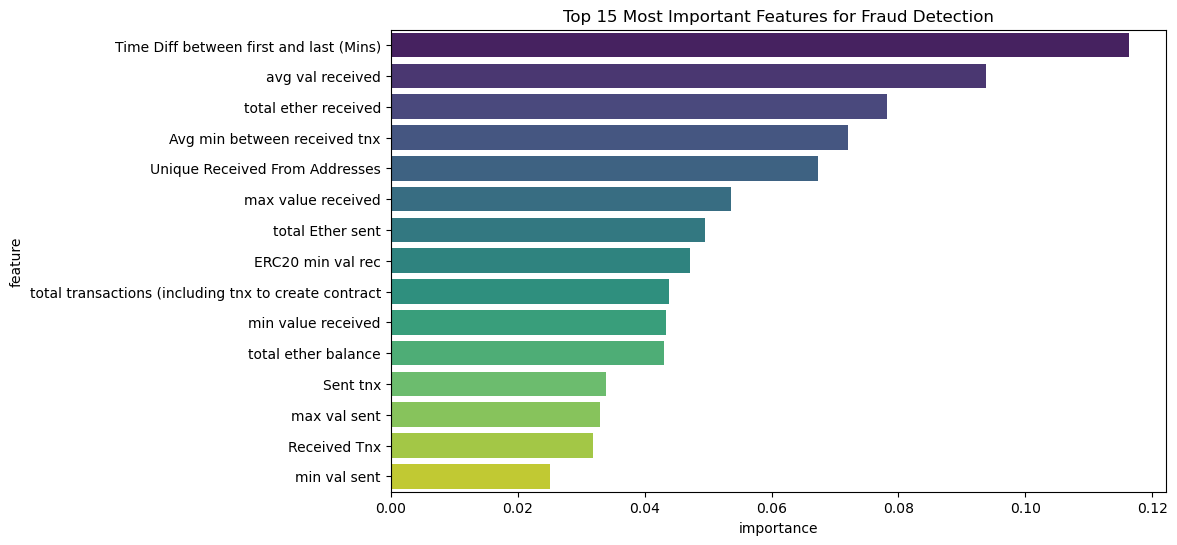

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp.head(15),hue='feature', palette='viridis')
plt.title('Top 15 Most Important Features for Fraud Detection')
plt.show()

In [48]:
from xgboost import XGBClassifier

In [49]:
spw = (y_train == 0).sum() / (y_train == 1).sum()

In [50]:
spw

np.float64(4.607547169811321)

In [51]:
xgb_pipeline = Pipeline([
    ('scaler', RobustScaler()), 
    ('classifier', XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=spw,   
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ))
])

In [52]:
xgb_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,objective,'binary:logistic'
,base_score,None


In [53]:
y_pred=xgb_pipeline.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1527
           1       0.90      0.88      0.89       331

    accuracy                           0.96      1858
   macro avg       0.94      0.93      0.93      1858
weighted avg       0.96      0.96      0.96      1858



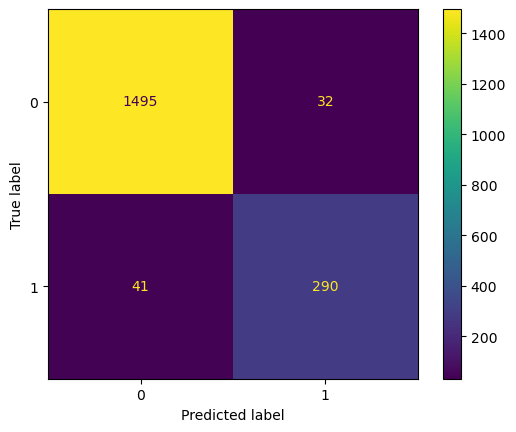

In [55]:
ConfusionMatrixDisplay.from_estimator(xgb_pipeline,X_test,y_test)
plt.show()

In [56]:
fraud_recall = make_scorer(recall_score, pos_label=1)

param_grid = {
    'classifier__max_depth': [4, 6, 8],
    'classifier__learning_rate': [0.03, 0.05, 0.1],
    'classifier__n_estimators': [300, 500],
    'classifier__subsample': [0.7, 0.8],
    'classifier__colsample_bytree': [0.7, 0.8]
}
grid_xgb = GridSearchCV(
    estimator=xgb_pipeline, 
    param_grid=param_grid,
    scoring=fraud_recall,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'classifier__colsample_bytree': [0.7, 0.8], 'classifier__learning_rate': [0.03, 0.05, ...], 'classifier__max_depth': [4, 6, ...], 'classifier__n_estimators': [300, 500], ...}"
,scoring,"make_scorer(r..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,with_centering,True


In [57]:
grid_xgb.best_params_

{'classifier__colsample_bytree': 0.8,
 'classifier__learning_rate': 0.03,
 'classifier__max_depth': 4,
 'classifier__n_estimators': 300,
 'classifier__subsample': 0.7}

In [58]:
y_pred=grid_xgb.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1527
           1       0.82      0.91      0.86       331

    accuracy                           0.95      1858
   macro avg       0.90      0.93      0.91      1858
weighted avg       0.95      0.95      0.95      1858



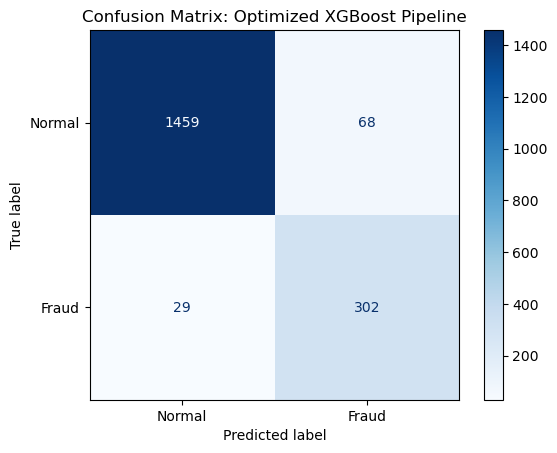

In [60]:
disp = ConfusionMatrixDisplay.from_estimator(
    grid_xgb.best_estimator_, 
    X_test, 
    y_test, 
    display_labels=['Normal', 'Fraud'],
    cmap='Blues',
    values_format='d'
)

plt.title("Confusion Matrix: Optimized XGBoost Pipeline")
plt.grid(False)
plt.show()

# Conclusion

In this project, the dataset initially had 51 columns, including unnecessary and zero-variance features. These columns were identified and removed to reduce noise and improve model performance. Highly correlated columns were also dropped to avoid multicollinearity issues.

The target variable was highly imbalanced, so class weights were added using
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
to help the model focus on fraud cases. GridSearchCV was used to select the best model and hyperparameters. The final XGBoost model performed well in detecting fraudulent transactions, showing that the preprocessing and imbalance handling steps were effective.